# **Experiments 5: Tunning hyperparamaters for KNN model using euclidean distance**



## The steps are:
1.   Load and explore dataset
2.   Data preparation: Feature selection(Gender) + Feature engineering(One hot encoding)
3.   Split data
4.   Build a KNN model using euclidean distance
5.   Build a KNN model using euclidean distance and n neighbors
6.   Assess model on Testing Set

## 1. Load and explore dataset

**[1.1]** Import packages

In [30]:
import pandas as pd
import numpy as np

**[1.2]** Create a variable called file_url containing the CSV file and load the dataset into dataframe called df

In [31]:
file_url = 'repurchase_training.csv'
df = pd.read_csv(file_url)

**[1.3]** Display the first 5 rows of df


In [32]:
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


**[1.4]** Display the dimensions of df

In [33]:
df.shape

(131337, 17)

**[1.5]** Display the summary of df

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

Columns with missing data: **age_band and gender**

**[1.6]** Display the descriptive statictics of df


In [35]:
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


There is no significant outliers in dataset.

## 2. Data preparation: Feature selection(Gender) + Feature engineering(One hot encoding)

**[2.1]** Create a copy of the dataframe and remove duplicated rows

In [36]:
df_cleaned = df.copy()
df_cleaned.drop_duplicates(inplace=True)

In [37]:
print(df_cleaned['car_model'].unique())

['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']


In [38]:
print(df_cleaned['car_segment'].unique())

['LCV' 'Small/Medium' 'Large/SUV' 'Other']


**[2.2]** Looking at all records that are the same with model 19 except car segment.

In [39]:
a=df_cleaned[df_cleaned['car_model']=='model_19']
b=a.drop('car_model', axis=1)
merged_df = pd.merge(df_cleaned, b, on=['Target', 'age_band', 'gender', 'age_of_vehicle_years',
       'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid',
       'non_sched_serv_paid', 'total_paid_services', 'total_services',
       'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased'])
merged_df

,ID_x,Target,age_band,gender,car_model,car_segment_x,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,ID_y,car_segment_y
0,3529,0,NaN,Male,model_3,Large/SUV,9,1,1,1,3,2,1,1,1,1,1,100546,Other
1,81547,0,NaN,Male,model_5,Large/SUV,9,1,1,1,3,2,1,1,1,1,1,100546,Other
2,100546,0,NaN,Male,model_19,Other,9,1,1,1,3,2,1,1,1,1,1,100546,Other
3,30920,0,NaN,Male,model_19,Other,9,1,1,3,1,2,1,1,1,1,1,30920,Other
4,68275,0,NaN,Male,model_5,Large/SUV,9,1,1,3,1,2,1,1,1,1,1,30920,Other
5,92955,0,NaN,Male,model_1,LCV,9,1,1,3,1,2,1,1,1,1,1,30920,Other


Not only one model could match model 19, so it better to remove data with model 19

**[2.3]** Remove model_19

In [40]:
df_cleaned=df_cleaned[df_cleaned['car_model']!='model_19']

**[2.4]** Find all car models with car segment is other.

In [41]:
df_cleaned[df_cleaned['car_segment']=='Other']['car_model'].describe()

count           56
unique           1
top       model_17
freq            56
Name: car_model, dtype: object

**[2.5]** Find all car segment that belong to model 17.

In [42]:
df_cleaned[df_cleaned['car_model']=='model_17']['car_segment'].describe()

count              153
unique               2
top       Small/Medium
freq                97
Name: car_segment, dtype: object

**[2.6]** Replacing other car segment to small and medium.

In [43]:
df_cleaned['car_segment']=df_cleaned['car_segment'].replace('Other','Small/Medium')

<ipython-input-43-796ec3898f6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['car_segment']=df_cleaned['car_segment'].replace('Other','Small/Medium')


**[2.7]** One hot encoding

In [44]:
df_cleaned.dropna(subset=['gender'], inplace=True)

<ipython-input-44-8d72e094a4ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=['gender'], inplace=True)


In [45]:
Encoding= pd.get_dummies(df_cleaned['car_segment'])
df_cleaned = pd.concat([df_cleaned, Encoding], axis=1)
Encoding= pd.get_dummies(df_cleaned['gender'])
df_cleaned = pd.concat([df_cleaned, Encoding], axis=1)

**[2.8]** Drop non-numeric columns

In [46]:
df_cleaned.drop(['age_band','gender','car_model','car_segment','ID'], axis=1,inplace=True)

**[2.9]** Remove all observation with missing values:

In [47]:
df_cleaned.dropna(how='any', inplace=True)

## 3. Data Splitting

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
y = df_cleaned.pop('Target')
X = df_cleaned
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [50]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

## 4. Build a KNN model using euclidian distance

**[4.1]** Import the KNeighborsClassifier class from sklearn

In [51]:
from sklearn.neighbors import KNeighborsClassifier

**[4.2]** Instantiate our model with metric:'euclidean'

In [52]:
knn_euc_class = KNeighborsClassifier(metric='euclidean')

**[4.3]** Fit our model with the training data

In [53]:
knn_euc_class.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

**[4.4]** Display the f1 score on the training set

In [54]:
from sklearn.metrics import f1_score
y_train_preds_knn_euc = knn_euc_class.predict(X_train)
f1_score(y_train, y_train_preds_knn_euc)

0.8820638820638821

**[4.5]** Display the f1 score on the validation set

In [55]:
y_val_preds_knn_euc = knn_euc_class.predict(X_val)
f1_score(y_val, y_val_preds_knn_euc)

0.7928388746803068

## 5. Build a KNN model using euclidean distance and n neighbors

**[5.1]** Build a funtion to find the best numbet of neighbors.

In [36]:
from sklearn.metrics import f1_score
def k_best(k_number):
  knn_euc_class = KNeighborsClassifier(n_neighbors=k_number,metric='euclidean')
  knn_euc_class.fit(X_train, y_train)
  y_train_preds_knn_euc = knn_euc_class.predict(X_train)
  print('In trainig set, neighbors= '+str(k_number) + ' : '+str(f1_score(y_train, y_train_preds_knn_euc)))
  y_val_preds_knn_euc = knn_euc_class.predict(X_val)
  print('In validation set, neighbors= '+str(k_number)+ ' : '+str(f1_score(y_val, y_val_preds_knn_euc)))
  print('Different, neighbors= '+str(k_number)+ ' : '+str(f1_score(y_train, y_train_preds_knn_euc)-f1_score(y_val, y_val_preds_knn_euc)))
  print('\n')

In [37]:
for i in range(1,35):
  k_best(i)

In trainig set, neighbors= 1 : 1.0
In validation set, neighbors= 1 : 0.7699999999999999
Different, neighbors= 1 : 0.2300000000000001


In trainig set, neighbors= 2 : 0.8860103626943004
In validation set, neighbors= 2 : 0.7479224376731303
Different, neighbors= 2 : 0.13808792502117018


In trainig set, neighbors= 3 : 0.9093107617896011
In validation set, neighbors= 3 : 0.7969924812030075
Different, neighbors= 3 : 0.11231828058659366


In trainig set, neighbors= 4 : 0.8648302370275464
In validation set, neighbors= 4 : 0.7807486631016043
Different, neighbors= 4 : 0.08408157392594207


In trainig set, neighbors= 5 : 0.8820638820638821
In validation set, neighbors= 5 : 0.7928388746803068
Different, neighbors= 5 : 0.0892250073835753


In trainig set, neighbors= 6 : 0.8618714194780395
In validation set, neighbors= 6 : 0.7754010695187166
Different, neighbors= 6 : 0.0864703499593229


In trainig set, neighbors= 7 : 0.8716676999380036
In validation set, neighbors= 7 : 0.7979274611398963
Different

**[5.2]** Training a model with neighbors=25

In [56]:
knn_euc_class25 = KNeighborsClassifier(n_neighbors=25,metric='euclidean')
knn_euc_class25.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=25)

**[5.3]** Display the f1 score on the training and validation set

In [57]:
from sklearn.metrics import f1_score
y_train_preds_knn_euc = knn_euc_class25.predict(X_train)
print(f1_score(y_train, y_train_preds_knn_euc))
y_val_preds_knn_euc = knn_euc_class25.predict(X_val)
print(f1_score(y_val, y_val_preds_knn_euc))

0.8202175303902751
0.79155672823219


## 6. Assess model on Testing Set

**[11.1]** Print the F1 scores of our best model on the testing set

In [58]:
y_test_preds_knn_euc = knn_euc_class25.predict(X_test)
print(f1_score(y_test, y_test_preds_knn_euc))

0.7924528301886793


**[11.2]** Display the confusion matrix for our best model on all sets

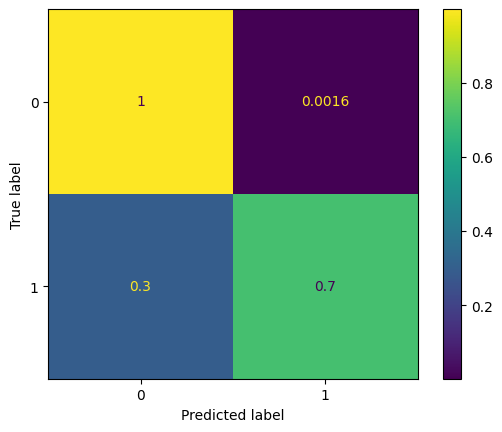

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(knn_euc_class25, X_test, y_test, normalize='true')